In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/customer_churn_dataset-testing-master.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [ ]:
# CustomerID: 고객ID	Age:나이	Gender:성별	Tenure:이용 기간	Usage Frequency:사용빈도	Support Calls:	Payment Delay:결제 지연 횟수	Subscription Type: 구독 유형	Contract Length:계약 기간	Total Spend:총 지출	Last Interaction:마지막 상호작용 	Churn: 이탈여부(이탈:1, 유지:0)

In [ ]:
data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [ ]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


Churn
0    33881
1    30493
Name: count, dtype: int64


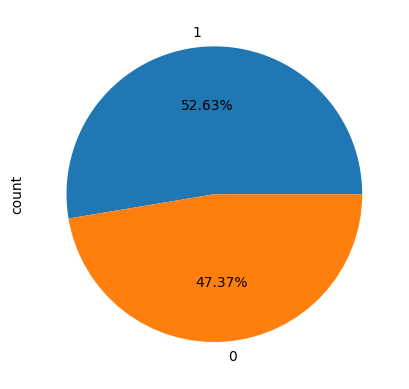

In [ ]:
count_churn = data['Churn'].value_counts()
print(count_churn)
count_churn.plot(kind='pie',
                 autopct= '%.2f%%',
                 labels= data['Churn'])
plt.show()

In [ ]:
df = data.copy()

In [ ]:
# 결측치 갯수 확인
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [ ]:
df.groupby(['Churn', 'Gender']).size()

Churn  Gender
0      Female    15442
       Male      18439
1      Female    18911
       Male      11582
dtype: int64

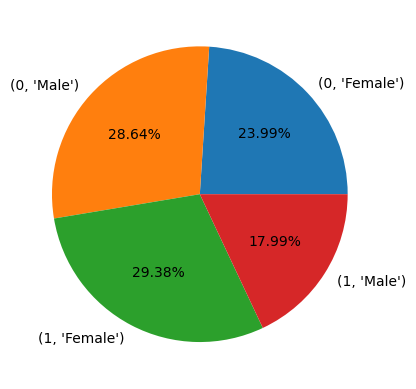

In [ ]:
plt.pie(df.groupby(['Churn', 'Gender']).size(),
        labels= df.groupby(['Churn', 'Gender']).size().index,
        autopct= '%.2f%%')
plt.show()
# 여성이 이탈하는 비율이 더 높음

In [136]:
# Age(나이)를 구간별로 나누기
age_group=['A','B','C','D','E','F','G']
df['age_group']= pd.qcut(df['Age'],7, labels= group)
pd.qcut(df['Age'],7).value_counts()
# A: 18~25세, B: 26~32세, C: 33~39세, D: 40~46세, E: 47~53세, F: 54~59세, G: 60~65세

,count
Age,
"(17.999, 25.0]",10343
"(46.0, 53.0]",9532
"(32.0, 39.0]",9300
"(25.0, 32.0]",9152
"(39.0, 46.0]",9012
"(59.0, 65.0]",8555
"(53.0, 59.0]",8480


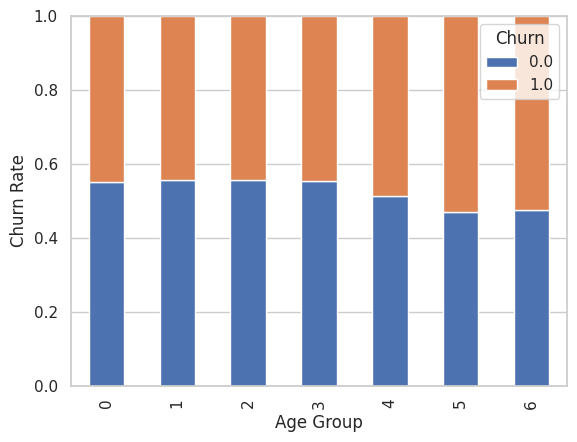

In [163]:
# age_group과 Churn 값에 대해 그룹화하여 비율 계산
age_group_churn_counts = df.groupby(['age_group', 'Churn']).size().unstack(fill_value=0)
age_group_churn_rate = age_group_churn_counts.div(age_group_churn_counts.sum(axis=1), axis=0)

age_group_churn_rate.plot(kind='bar', stacked=True)
plt.ylim(0, 1)  # y축 범위를 0부터 1로 설정
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.show()
# 연령이 높아질수록 이탈비율이 높음

In [168]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['age_group'] = df['age_group'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})

In [186]:
from sklearn.preprocessing import LabelEncoder

# object 타입 변수 식별
object_columns = df.select_dtypes(include=['object']).columns

# 라벨 인코더 생성
label_encoders = {col: LabelEncoder() for col in object_columns}

# 각 object 타입 변수에 대해 라벨 인코딩 수행
for col, le in label_encoders.items():
    df[col] = le.fit_transform(df[col])

# 결과 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerID         64374 non-null  int64   
 1   Age                64374 non-null  int64   
 2   Gender             0 non-null      float64 
 3   Tenure             64374 non-null  int64   
 4   Usage Frequency    64374 non-null  int64   
 5   Support Calls      64374 non-null  float64 
 6   Payment Delay      64374 non-null  float64 
 7   Subscription Type  64374 non-null  int64   
 8   Contract Length    64374 non-null  int64   
 9   Total Spend        64374 non-null  int64   
 10  Last Interaction   64374 non-null  int64   
 11  Churn              64374 non-null  float64 
 12  group              64374 non-null  category
 13  age_group          0 non-null      float64 
dtypes: category(1), float64(5), int64(8)
memory usage: 6.4 MB
